# The local search lab

In [18]:
include("structs.jl")
include("utils.jl")

bin2real (generic function with 2 methods)

## Fitness functions

In [19]:
include("objective_functions.jl")

f_rosenbrock (generic function with 1 method)

## For binary chromosomes

In [20]:
binary_chromosome = get_binary_chromosome([0,1,0,1,0,1])

BinaryChromosome(Bool[0, 1, 0, 1, 0, 1], 6)

### OneMax
The sum of true values

In [21]:
f_onemax(binary_chromosome)

3

### LABS
No clue wtf this means

In [22]:
f_LABS(binary_chromosome)

55.0

## For vectors of real numbers (real numbered chromosomes)

In [23]:
real_chromosome = get_real_chromosome([1,2,3,4,5,6,7])

RealChromosome(Real[1, 2, 3, 4, 5, 6, 7], 7)

### Sphere

In [24]:
f_sphere(real_chromosome, [1,2,3,4,5,6,7])
f_sphere(get_real_chromosome([-0.1, -1.2, -2.3, -3.4, -4.5, -5.6, -6.7, -7.8, -8.9, -9.1]), ones(10))

446.85999999999996

### Rosenbrock

In [25]:
f_rosenbrock(real_chromosome)

135055.0

## Test bin2real

### 1D

In [26]:
x = get_binary_chromosome([0]);
@show bin2real(0, 1, x)
x = get_binary_chromosome([0,1,0]);
@show bin2real(0, 1, x)
x = get_binary_chromosome([0 0 0 0 0 0 0 0 0 0 0 1]);
@show bin2real(0, 1, x)

bin2real(0, 1, x) = [0.0]
bin2real(0, 1, x) = [0.2857142857142857]
bin2real(0, 1, x) = [0.0002442002442002442]


1-element Vector{Float64}:
 0.0002442002442002442

works

### 2D

In [27]:
lb = [0,0]
ub = [1,1]
x = get_binary_chromosome([0])
@show bin2real(lb, ub, x)
println()

x = get_binary_chromosome([0,1])
@show bin2real(lb, ub, x)
println()

x = get_binary_chromosome([0 0 0 0 0 0 0 0 0 0 0 1])
@show bin2real(lb, ub, x);

"The binary vector length is not divisible by the dimensionality of the target vector space."

bin2real(lb, ub, x) = Float64[]

bin2real(lb, ub, x) = [0.0, 1.0]

bin2real(lb, ub, x) = [0.0, 0.015873015873015872]


works

### 3D

In [28]:
lb = [0,-8,-8]
ub = [15,7,8]
x = get_binary_chromosome([0])
@show bin2real(lb, ub, x)
println()

x = get_binary_chromosome([0,1, 1])
@show bin2real(lb, ub, x)
println()

x = get_binary_chromosome([0 0 0 0 0 0 0 0 0 0 0 1])
@show bin2real(lb, ub, x);

"The binary vector length is not divisible by the dimensionality of the target vector space."

bin2real(lb, ub, x) = Float64[]

bin2real(lb, ub, x) = [0.0, 7.0, 8.0]

bin2real(lb, ub, x) = [0.0, -8.0, -6.933333333333334]


In [29]:
# 6D
lb = [0,1,2,3,4,5]
ub = [2,4,6,8,10,12]
x = get_binary_chromosome([0])
@show bin2real(lb, ub, x)
println()

x = get_binary_chromosome([0,1, 1])
@show bin2real(lb, ub, x)
println()

x = get_binary_chromosome([0 0 0 0 0 0 0 0 0 0 0 1])
@show bin2real(lb, ub, x);

# werchs

"The binary vector length is not divisible by the dimensionality of the target vector space."

"The binary vector length is not divisible by the dimensionality of the target vector space."

bin2real(lb, ub, x) = Float64[]

bin2real(lb, ub, x) = Float64[]

bin2real(lb, ub, x) = [0.0, 1.0, 2.0, 3.0, 4.0, 7.333333333333334]


6-element Vector{Float64}:
 0.0
 1.0
 2.0
 3.0
 4.0
 7.333333333333334

## Run local search

In [34]:
include("structs.jl")
include("utils.jl")
include("objective_functions.jl")

include("optimizers.jl")
include("preturbations.jl")
include("terminal_conditions.jl")

using Random

x_0 = bitrand(100)
res = first_improving_local_search(f_LABS, basic_preturbation!, iteration_termination, x_0, 0.5, 10e6);
println(res[1])
display(res[2])

26094.0

Bool[1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0]


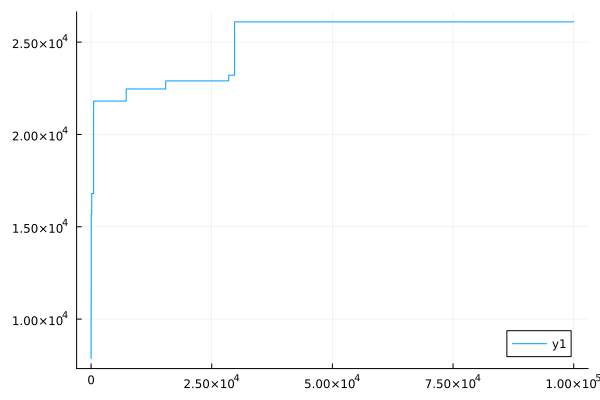

In [35]:
using Plots

plot(res[3])

73

Bool[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]


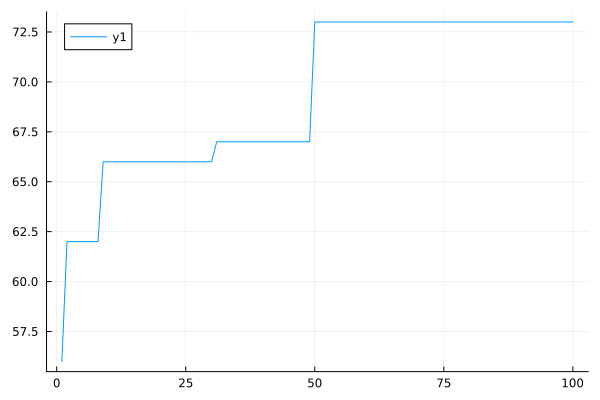

In [15]:
include("optimizers.jl")
include("preturbations.jl")
include("terminal_conditions.jl")

using Random
using Plots

x_0 = Bool.(zeros(100))
res = first_improving_local_search(f_onemax, basic_preturbation!, iteration_termination, x_0, 0.1, 10e3);
println(res[1])
display(res[2])

plot(res[3])